In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./public/FinalGroupdataset.xlsx")

In [ ]:
inflation_data = data[~(data["Inflation"].isna())][["Date","Inflation"]]
dollar_effect = (1 + inflation_data["Inflation"]).cumprod()
inflation_data["dollar_deval"] = 1 / dollar_effect
inflation_data.columns

In [7]:
# with open("dollarDevaluation.json", "w") as file:
#     file.write(inflation_data[["Date", "dollar_deval"]].to_json(orient="records"))


In [5]:
inflation = pd.read_excel("./public/Infaltion.xlsx",sheet_name="Data")
inflation = inflation.iloc[4:-6,[1,2]]

In [6]:
inflation.columns = ["date", "inflation"]
inflation["inflation"] = inflation["inflation"]/100
inflation["date"] = pd.to_datetime(inflation.date, format="%Y")
inflation  = inflation.iloc[3:,:]
inflation_data = inflation[["date"]]
inflation_data["dollar_deval"] =1 / ((1+inflation["inflation"]).cumprod())

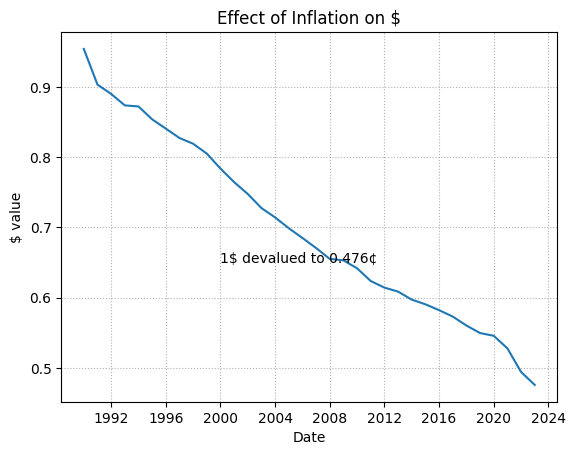

In [7]:
plt.plot(inflation_data.date, inflation_data.dollar_deval)
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Effect of Inflation on $")
plt.annotate(f"1$ devalued to {inflation_data.dollar_deval.iloc[-1]:.3f}\u00A2",(inflation_data.date.iloc[10],0.65))
plt.show();

In [24]:
# with open("inflation.json", "w") as file:
#     file.write(inflation_data[["date", "dollar_deval"]].to_json(orient="records"))

In [8]:
housing  = data[["Date", "Average House Prices"]]
housing = housing.dropna()
housing["returns"] = housing["Average House Prices"].pct_change()
housing = housing.dropna()
housing["dollar_apprec"] = (1 + housing["returns"]).cumprod()

In [ ]:
# with open("dollar_housing.json", "w") as file:
#     file.write(housing[["Date", "dollar_apprec"]].to_json(orient="records"))

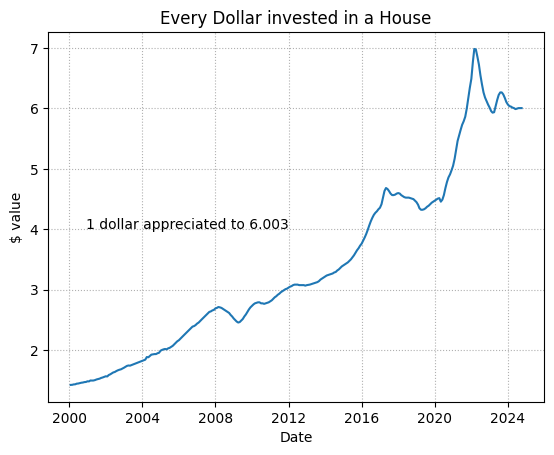

In [9]:
plt.plot(housing["Date"],housing["dollar_apprec"])
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Every Dollar invested in a House")
plt.annotate(f"1 dollar appreciated to {housing.dollar_apprec.iloc[-1]:.3f}",(housing.Date.iloc[10],4))
plt.show();

In [3]:
stock_data = data[["Date", 'Stock Movement']]
stock_data["returns"] = stock_data["Stock Movement"].pct_change()
stock_data["dollar_value"] = (1 + stock_data["returns"]).cumprod()

In [ ]:
# with open("cumulative_stockData.json", "w") as file:
#     file.write(stock_data["dollar_value"].dropna().to_json(orient="records"))

In [20]:
sd = stock_data[["Date","dollar_value"]]
sd[(sd.Date > "2021") & (sd.Date < "2024")]["dollar_value"].max()

np.float64(2.5810567025503746)

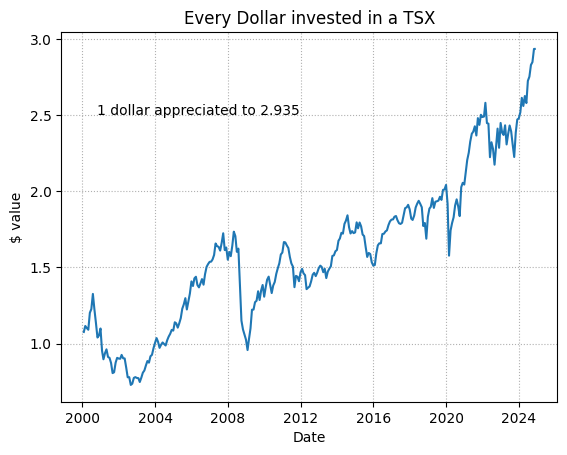

In [4]:
plt.plot(stock_data["Date"],stock_data["dollar_value"])
plt.grid(linestyle="dotted");
plt.xlabel("Date")
plt.ylabel("$ value")
plt.title("Every Dollar invested in a TSX")
plt.annotate(f"1 dollar appreciated to {stock_data.dollar_value.iloc[-1]:.3f}",(stock_data.Date.iloc[10],2.5))
plt.show();

In [23]:
bond = data[["Date", "10 Years Bond Interest"]]
bond = bond[bond.Date > "2000"]
bond = bond.dropna()
bond["10 Years Bond Interest"] = bond["10 Years Bond Interest"] / 100

In [40]:
bond_interest = bond[bond.Date == bond.Date[170]]
bond_interest

,Date,10 Years Bond Interest
170,2014-02-28,0.02435


In [54]:
# 10 year returns without compounding:
principal = 1000
coupon_return = principal * (0.02435/ 2)
total_periods = 10 * 2
print(coupon_return)
total_coupons  = coupon_return * total_periods
print(total_coupons)
total_return = principal + total_coupons
print(total_return)

12.175
243.5
1243.5


In [55]:
# compounding the coupon:
coupon_semi_annual_rate = 0.02435/ 2
coupon_payment = principal * coupon_semi_annual_rate
num_periods = 10 * 2
total_reinvested_coupons = 0
compounding_data  = []
for i in range(1, num_periods+1):
    remaining_preiods = num_periods -1
    fv = coupon_payment * (1 + coupon_semi_annual_rate) ** remaining_preiods
    total_reinvested_coupons += fv
    compounding_data.append(round(total_reinvested_coupons,2))
total_return_with_compounding = total_reinvested_coupons + principal
print(round(total_return_with_compounding,2))

1306.45


In [57]:
time_series_bond = pd.Series(np.array(compounding_data) + principal , name="Value Growth")
with open("compounded_bond.json", "w") as file:
    file.write(time_series_bond.to_json(orient="records"))